In [2]:
from dependencies import *
from save_data import *

In [3]:
LIP_dict = {'Franklin_large':{'label': 'Franklin, 11Mkm$^2$', 'c': 'k'},
            'Franklin_small': {'label': 'Franklin, 2.62Mkm$^2$','c': '#666666'},
            'CAMP': {'label': 'CAMP', 'c': 'firebrick'},
            'Kola-Dnieper': {'label': 'Kola-Dnieper', 'c': 'chocolate'},
            'Kalkarindji': {'label': 'Kalkarindji', 'c': 'goldenrod'}
           }

In [4]:
for LIP in LIP_dict:
    filename = f"data/{LIP}_filtered.nc"
    read_summary_stats(filename)
    print("")
    
    with Dataset(filename, "r") as ds:
        min_T = ds.groups['stats'].variables['min_temp'][:]
        min_T_normed = ds.groups['stats'].variables['min_normed_temp'][:]
        min_T_normed = min_T_normed[~np.isnan(min_T_normed)]
        
    LIP_dict[LIP]['min_T'] = min_T
    LIP_dict[LIP]['min_T_normed'] = min_T_normed

Reading summary statistics from data/Franklin_large_filtered.nc
Average cooling: -13.37 K
Late flag percentage: 100.00%
Early flag percentage: 66.52%
Snowball flag percentage: 33.48%

Reading summary statistics from data/Franklin_small_filtered.nc
Average cooling: -2.87 K
Late flag percentage: 9.02%
Early flag percentage: 0.00%
Snowball flag percentage: 9.02%

Reading summary statistics from data/CAMP_filtered.nc
Average cooling: -14.04 K
Late flag percentage: 30.47%
Early flag percentage: 18.62%
Snowball flag percentage: 11.86%

Reading summary statistics from data/Kola-Dnieper_filtered.nc
Average cooling: -9.17 K
Late flag percentage: 20.60%
Early flag percentage: 6.39%
Snowball flag percentage: 14.22%

Reading summary statistics from data/Kalkarindji_filtered.nc
Average cooling: -5.64 K
Late flag percentage: 2.29%
Early flag percentage: 0.21%
Snowball flag percentage: 2.07%



In [5]:
print(100-30.47)
print(100-20.60)
print(100-2.29)

69.53
79.4
97.71


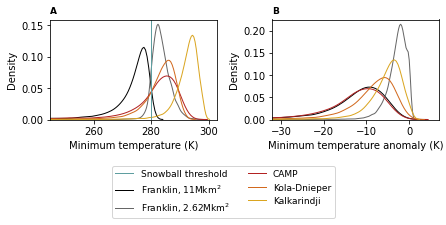

In [6]:
plt.rcParams.update({'legend.fontsize':7,
                     'font.size':9,
                     'lines.linewidth':1,
                     'axes.titlesize':9})

## LIP comparison: filtered

fig, axs = plt.subplots(1,2, figsize=(6.3,2.3))

for LIP in LIP_dict.keys():
    min_T = LIP_dict[LIP]['min_T']
    sns.kdeplot(min_T,ax=axs[0],
                color=LIP_dict[LIP]['c'])
    
    min_T_normed = LIP_dict[LIP]['min_T_normed']
    sns.kdeplot(min_T_normed,ax=axs[1],
                color=LIP_dict[LIP]['c'],
                label=LIP_dict[LIP]['label'])
    
ax = axs[0]
ax.set_title('A', loc='left', fontweight='bold')
ax.set_xlim(245,303)
ax.set_xlabel('Minimum temperature (K)')
ax.axvline(280,color='cadetblue',label='Snowball threshold')

ax = axs[1]
ax.set_title('B', loc='left', fontweight='bold')
ax.set_xlim(-32,7)
ax.set_xlabel('Minimum temperature anomaly (K)')

fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.0), ncol=2,fontsize=9)
#fig.legend(loc='upper left', bbox_to_anchor=(1,0.97))

plt.tight_layout()
plt.savefig('figs/Phanerozoic_LIPs'+'.jpg',format='jpg',bbox_inches='tight',dpi=600)
plt.show()